# RosterMD Data Analysis and Model Training

Making all the necessary imports to conduct analysis

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [29]:
df = pd.read_excel("worker_satisfaction.xlsx")

Exploring the dataset

---



In [30]:
df.head()

,AGE,GENDER,MARITAL STATUS,HOUSEHOLD,RESIDENCE TYPE,REGION,SMOKING,SPECIALTY,CLASSIFICATION,WORKPLACE,...,Burnout Q6,Burnout Q7,Burnout Q8,Burnout Q9,Burnout Q10,Job Satisfaction Q1,Job Satisfaction Q2,Job Satisfaction Q3,Job Satisfaction Q4,Job Satisfaction Q5
0,24,Female,Single,4-6 Persons,Owned Falt/House,"Central (Amman, Zarqa, Madaba, Al-Balqaa)",Non-smoker,Medical,General Practitioner,Non-Governmental Organizations,...,Sometimes,Sometimes,Sometimes,Often,Sometimes,Neutral/undecided,Neutral/Undecided,Neutral/Undecided,Neutral/Undecided,Neutral/Undecided
1,24,Male,Single,4-6 Persons,Owned Falt/House,"Central (Amman, Zarqa, Madaba, Al-Balqaa)",Non-smoker,Medical,General Practitioner,Jordanian Ministry of Health,...,Sometimes,Almost Never,Never,Sometimes,Rarely,Neutral/undecided,Strongly disagree,Neutral/Undecided,Strongly disagree,Strongly disagree
2,24,Male,Single,1-3 Persons,Owned Falt/House,"Central (Amman, Zarqa, Madaba, Al-Balqaa)",Non-smoker,Medical,General Practitioner,Jordanian Royal Medical Services,...,Very Often,Never,Always,Never,Very Often,Strongly disagree,Strongly disagree,Agree,Strongly disagree,Strongly agree
3,24,Female,Single,4-6 Persons,Owned Falt/House,"North (Irbid, Ajloun, Jerash, Mafraq)",Non-smoker,Medical,General Practitioner,Jordanian Royal Medical Services,...,Sometimes,Sometimes,Rarely,Sometimes,Sometimes,Neutral/undecided,Agree,Neutral/Undecided,Agree,Neutral/Undecided
4,24,Female,Single,>6 Persons,Owned Falt/House,"Central (Amman, Zarqa, Madaba, Al-Balqaa)",Non-smoker,Medical,General Practitioner,University Hospitals,...,Rarely,Rarely,Rarely,Almost Never,Rarely,Agree,Agree,Agree,Agree,Disagree


In [31]:
df.columns

Index(['AGE', 'GENDER', 'MARITAL STATUS', 'HOUSEHOLD ', ' RESIDENCE TYPE',
       ' REGION', 'SMOKING', 'SPECIALTY', 'CLASSIFICATION', 'WORKPLACE',
       'JOB STATUS', 'MONTHLY SALARY', 'DUTY HOURS/WEEK', 'NIGHT SHIFTS/WEEK',
       'SUFFICIENT PPE', 'COVID-19 INCENTIVES', 'COVID-19 STATUS',
       'Burnout Q1', 'Burnout Q2', 'Burnout Q3', 'Burnout Q4', 'Burnout Q5',
       'Burnout Q6', 'Burnout Q7', 'Burnout Q8', 'Burnout Q9', 'Burnout Q10',
       'Job Satisfaction Q1', 'Job Satisfaction Q2', 'Job Satisfaction Q3',
       'Job Satisfaction Q4', 'Job Satisfaction Q5'],
      dtype='object')

Preliminary feature filtering

---


In [32]:
df = df.drop([" REGION", " RESIDENCE TYPE", "COVID-19 INCENTIVES", "COVID-19 STATUS"], axis = 1)

Numerical encodings of output data
- `question_mapping`: Burnout Questionnaire Emotional/Physical States
- `burnout_mapping`: Qualitative to numeric score (on scale 1-7)
- `satisfaction_mapping`: Qualitative to numeric score (on scale 1-5)

In [33]:
question_mapping = ["Tired", "Disappointed with people", "Hopeless", "Trapped", "Helpless", "Depressed", "Physically weak/Sickly", "Worthless/Like a failure", "Difficulties sleeping", "I've had it"]
burnout_mapping = {"never": 1, "almost never": 2, "rarely": 3, "sometimes": 4, "often": 5, "very often": 6, "always": 7}
satisfaction_mapping = {"strongly disagree": 1, "disagree": 2, "neutral/undecided": 3, "agree": 4, "strongly agree": 5}

Performing the label encoding of output data

---



In [34]:
for col in df.columns:
  if "Burnout" in col:
    df[col] = df[col].map(lambda x: burnout_mapping[x.strip().lower()])
  elif "Job Satisfaction" in col:
    df[col] = df[col].map(lambda x: satisfaction_mapping[x.strip().lower()])

Account for a special case in the job satisfaction questionnaire

---



In [35]:
reversed_case = ["Job Satisfaction Q3", "Job Satisfaction Q5"]
for col in reversed_case:
  df[col] = df[col].map(lambda x: 6-x)

# Data Analysis

Checking how independent the question features are of each other for job burnout

---



Text(0.5, 1.0, 'Burnout QA Correlation')

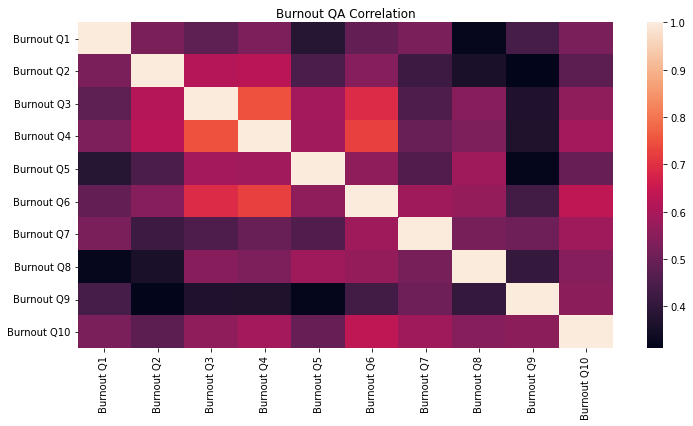

In [36]:
burnout = df[[col for col in df.columns if "Burnout" in col]]
plt.figure(figsize = (12, 6))
sns.heatmap(burnout.corr())
plt.title("Burnout QA Correlation")

Checking how burnout ratings varied across the dataset and which physical/emotional states were dominating certain burnout levels (with higher rating meaning higher levels of burnout).

---



Burnout Q1
Burnout Q2
Burnout Q3
Burnout Q4
Burnout Q5
Burnout Q6
Burnout Q7
Burnout Q8
Burnout Q9
Burnout Q10


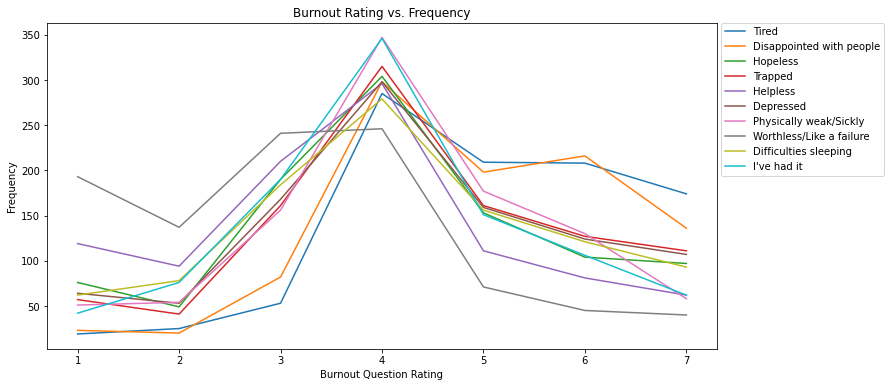

In [37]:
burnout_counts = {}
plt.figure(figsize = (12, 6))
for i, col in enumerate(burnout.columns):
  print(col)
  counts = burnout[col].value_counts().sort_index()
  plt.plot(counts.index, counts, label = question_mapping[i])
plt.xlabel("Burnout Question Rating")
plt.ylabel("Frequency")
plt.title("Burnout Rating vs. Frequency")
plt.legend(bbox_to_anchor=(1.25,1), borderaxespad=0)

Checking how independent the question features are of each other for job satisfaction

---



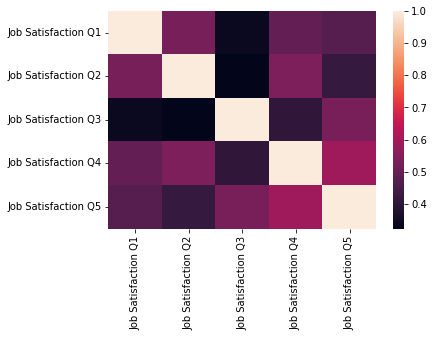

In [38]:
satisfaction = df[[col for col in df.columns if "Satisfaction" in col]]
sns.heatmap(satisfaction.corr())

Fabricating new, quantitative features to conduct more holistic analysis

---


In [67]:
df["Burnout Score"] = df["Burnout Q1"] + df["Burnout Q2"] + df["Burnout Q3"] + df["Burnout Q4"] + df["Burnout Q5"] + df["Burnout Q6"] + df["Burnout Q7"] + df["Burnout Q8"] + df["Burnout Q9"] + df["Burnout Q10"]
df["Burnout Score"] = df["Burnout Score"]/10
df["Burnout Score"]
df["Satisfaction Score"] = 0
for i in range(1, 6):
  df["Satisfaction Score"] = df["Satisfaction Score"] + df[f"Job Satisfaction Q{i}"]
df["Satisfaction Score"] = df["Satisfaction Score"] / 5

## Burnout Score Analysis

Impact of monthly salary and age on burnout score (tired being the most dominant reason for burnout, and hopeless being the least)

---



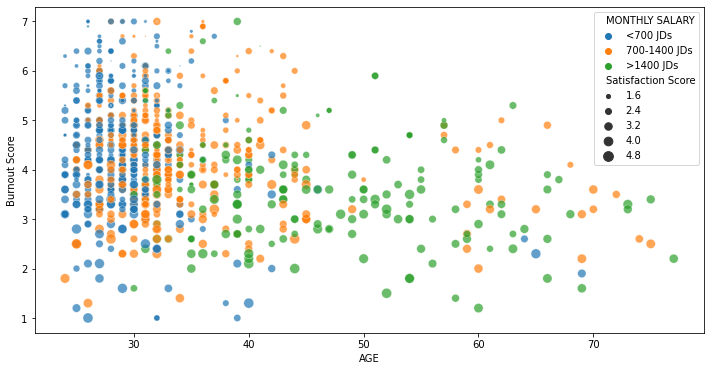

In [40]:
plt.figure(figsize = (12, 6))
sns.scatterplot(data = df, x = "AGE", y = "Burnout Score", hue = "MONTHLY SALARY", size = "Satisfaction Score", alpha = 0.7, sizes = (2, 100))

Impact of job type and age on burnout score

---



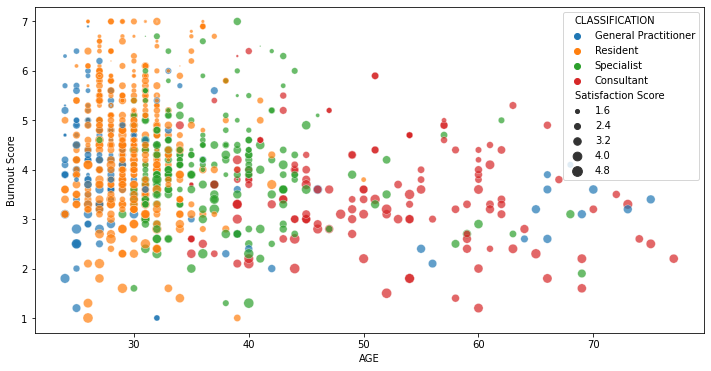

In [41]:
plt.figure(figsize = (12, 6)) 
sns.scatterplot(data = df, x = "AGE", y = "Burnout Score", hue = "CLASSIFICATION", size = "Satisfaction Score", alpha = 0.7, sizes = (2, 100))

Impact of duty hours per week and age on burnout score.

---



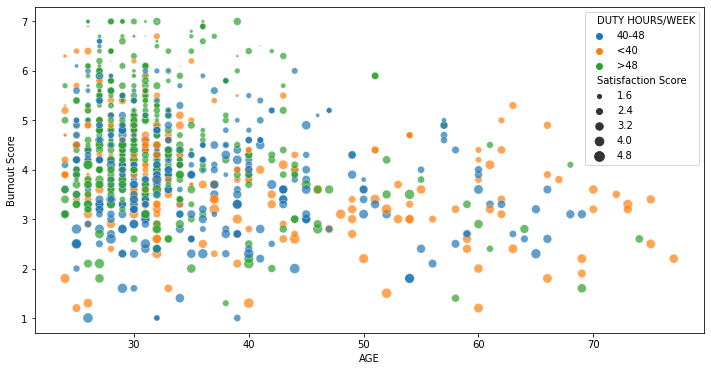

In [42]:
plt.figure(figsize = (12, 6))
sns.scatterplot(data = df, x = "AGE", y = "Burnout Score", hue = "DUTY HOURS/WEEK", size = "Satisfaction Score", alpha = 0.7, sizes = (2, 100))

Impact of night shifts per week and age on burnout score.

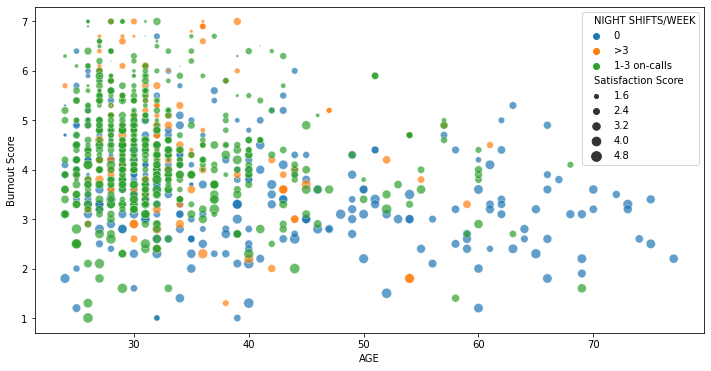

In [43]:
plt.figure(figsize = (12, 6))
sns.scatterplot(data = df, x = "AGE", y = "Burnout Score", hue = "NIGHT SHIFTS/WEEK", size = "Satisfaction Score", alpha = 0.7, sizes = (2, 100))

Finding the relationship between workers' burnout scores and job satisfaction ratings

---



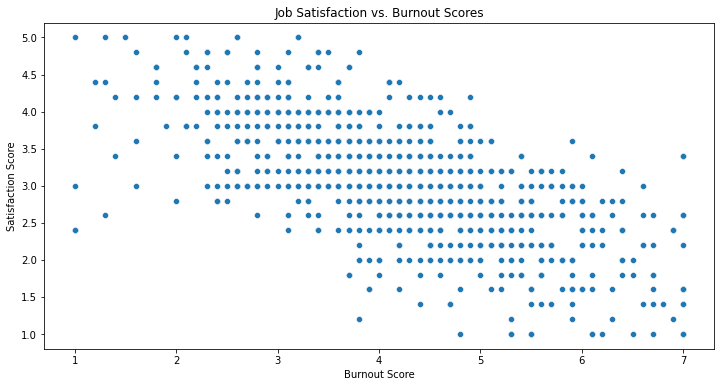

In [44]:
plt.figure(figsize = (12, 6))
plt.title("Job Satisfaction vs. Burnout Scores")
sns.scatterplot(x = df["Burnout Score"], y = df["Satisfaction Score"])

# Training the Model

Making all the necessary imports to implement the pipeline using scikit-learn from Python!

---



In [45]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import pickle

Developing manual, unchangeable label encodings on input data 

---



In [46]:
encodings = {}
reverse_encodings = {}

In [47]:
input_cols = ["AGE", "GENDER", "MARITAL STATUS", "HOUSEHOLD ", "SMOKING", "SPECIALTY", "CLASSIFICATION", "WORKPLACE", "JOB STATUS", "MONTHLY SALARY", "DUTY HOURS/WEEK", "NIGHT SHIFTS/WEEK"]
categorical = input_cols[1:]
encodings["GENDER"] = {"Male": 0, "Female": 1}
encodings["MARITAL STATUS"] = {"Single": 0, "Married": 1}
encodings["HOUSEHOLD "] = {"1-3 Persons": 0, "4-6 Persons": 1, ">6 Persons": 2}
encodings["SMOKING"] = {"Smoker": 0, "Non-smoker": 1}
encodings["SPECIALTY"] = {"Medical": 0, "Medical ": 0, "Surgical": 1}
reverse_encodings["SPECIALTY"] = {0: "Medical", 1: "Non-medical"}
encodings["CLASSIFICATION"] = {"General Practitioner": 0, "Resident": 1, "Specialist": 2, "Consultant": 3}
encodings["WORKPLACE"] = {"Private Hospitals/Clinics": 0, "University Hospitals": 0, "Jordanian Ministry of Health": 1, "Non-Governmental Organizations": 0, "Jordanian Royal Medical Services": 1}
encodings["JOB STATUS"] = {"Part-Time": 0, "Full-Time": 1}
encodings["MONTHLY SALARY"] = {"<700 JDs": 0, "700-1400 JDs": 1, ">1400 JDs": 2}
encodings["DUTY HOURS/WEEK"] = {"40-48": 0, ">48": 1, "<40": 2}
encodings["NIGHT SHIFTS/WEEK"] = {"1-3 on-calls": 1, 0: 0, ">3": 2}
df["Satisfaction Score"] = 6 - df["Satisfaction Score"]
for col in encodings:
  df[col] = df[col].map(lambda x: encodings[col][x])
  if col not in reverse_encodings:
    reverse_encodings[col] = {value: key for key, value in encodings[col].items()}


Training a linear regression model

---



In [49]:
x_train, x_test, y_train, y_test = train_test_split(df[input_cols], df[["Burnout Score", "Satisfaction Score"]], test_size = 0.2, shuffle = True)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(mean_squared_error(y_pred, y_test))

0.765504037581386


Compiling the model and the test data to be used by the scheduling algorithm

---



In [55]:
y_pred = pd.DataFrame(y_pred, columns = ["Burnout Score", "Job Satisfaction Score"])

In [56]:
x_test.head(20).to_csv("sample.csv")
y_pred.head(20).to_csv("predicted_labels.csv")

In [57]:
file1 = "model.sav"

In [58]:
pickle.dump(lr, open(file1, "wb"))
#pickle.dump(lr2, open(file2, "wb"))

Reverse encoding the test dataset in order to make it readable.

In [65]:
sample = x_test.head(20)
for col in categorical:
  sample[col] = sample[col].map(lambda x: reverse_encodings[col][x])

In [66]:
sample_labels = y_pred.head(20)
sample_labels["Job Satisfaction Score"] = 6 - sample_labels["Job Satisfaction Score"]

In [62]:
sample.to_csv("sample_original.csv")

In [63]:
sample_labels.to_csv("sample_labels_original.csv")